# Data for the Predictive Maintenance Classification

10,000 data points total, with one data point per row and 14 column features, make up the dataset.

UID: A unique identifier with a range of 1 to 10,000.

ProductID: (L | M | H) + serial number at the variant level

Sort: (L, M, or H)

Air Temperature [K]: A process which is random with standard of variation around 2k and 300 K was normalized using Numpy.

Process temperature [K]: Off temperature of air addedd 10 K, based on a random walk process N(0,K 1 std. dev. = 1).

Rpm: Added normally distributed noise to a power output of 2860 W.

Torque [Nm] is the number. Sd(σ): 10, min: 0, and mean: 40 are normally distributed.[-]

Tool wear [min]: 5/3/2 min used tool in process is increased by quality variants H/M/L.



Target: Failure or Not

Machine failure type: Failing or not failing because of failure Modes 1/2/3

Want to be able to input realistic data to be used for predictive maintenance modeling and analysis?

Dataset: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

# **Predictive Analysis on Machine maintenance**
In order to find the model that most accurately fits the data, we will run six different machine learning algorithms through a predictive maintenance dataset. The employed algorithm is:


---



1. Gradient Boosting/Classifier Machine
2. The decision tree
3. The Random Forest
4. SVM, or Support Vector Machine
5. Logistic Regression
6. KNN, or K-Nearest Neighbor



This cell imports all the necessary libraries for machine learning (sklearn), data visualization (matplotlib and seaborn), numerical computing (numpy), and data manipulation (pandas).
1. For data preprocessing, OneHotEncoder, StandardScaler, and LabelEncoder are utilized.
2. To split the data and assess the model, utilize train_test_split and cross_val_score.
3. The construction_matrix, classification_report, and accuracy_score are used to assess the model's performance.
4. To train several machine learning models, various classifiers from sklearn are loaded. Gradient boosting classifiers, decision trees, KNN, SVC, gradient regression, and more

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Reading the dataset file from pandas (pd.read) function and storing in tha data variable
loading dataset in the dataframe

In [2]:
data = pd.read_csv("predictive_maintenance.csv")

Setting up panda to display max columns and rows when want to see dataset

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Displaying top 10 rows of dataset

In [4]:
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


Checking up data description to know the nature of data min , max values to see any irrelenat value or negative value

In [5]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Checking datatype of columns and NON-NULL count

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Checking up unique value count in dataset

In [8]:
print(data.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64


Change M to 1, L to 2, and H to 3.
To make all column values ​​numeric

In [9]:
data['Product ID'] = data['Product ID'].str.replace('M', '1').str.replace('L', '2').str.replace('H', '3')

Now changing datatype of object to integer

In [10]:
data['Product ID'] = data['Product ID'].astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  int64  
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 781.4+ KB


# EDA

Checking up target variable count distribution
how many values are 0 and how many are 1

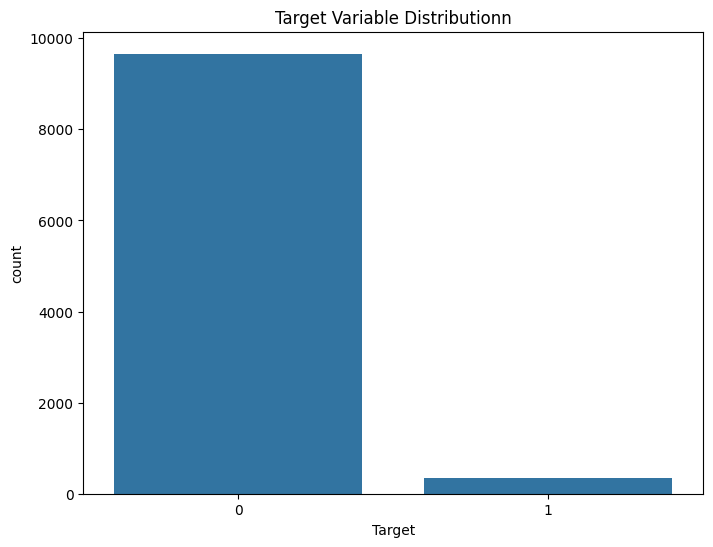

In [12]:
#BAR PLOT of the distribution of the Target Variables

plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data)
plt.title('Target Variable Distributionn')
plt.savefig('target_variable_distribution.png')
plt.show()

Data Distribution of the Numeric Columns

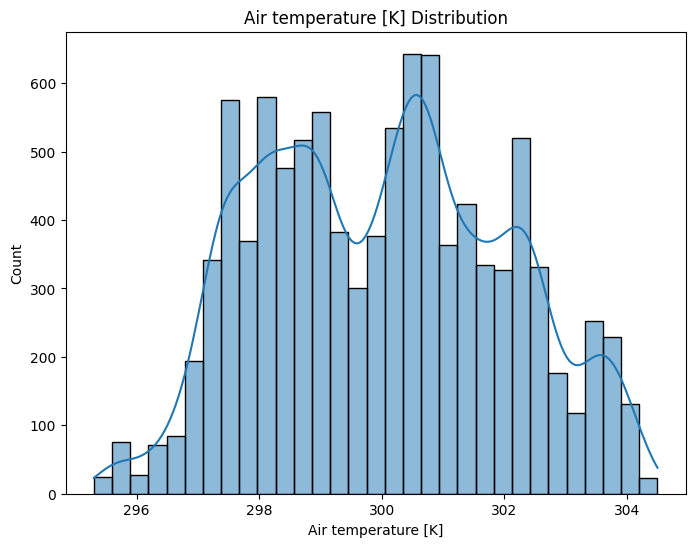

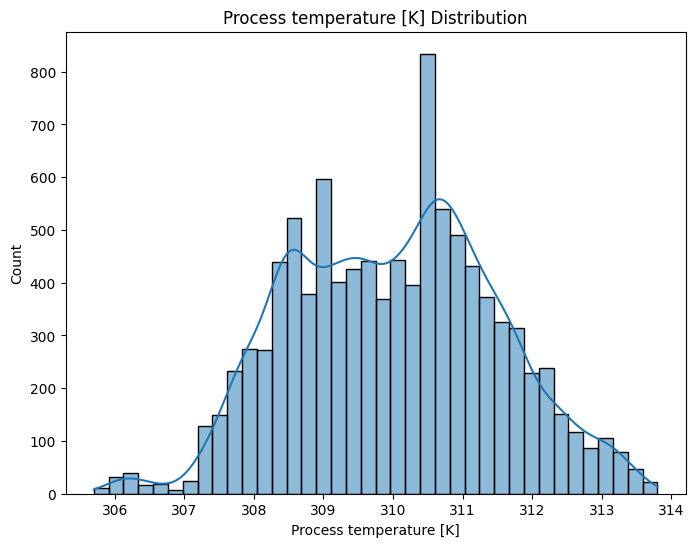

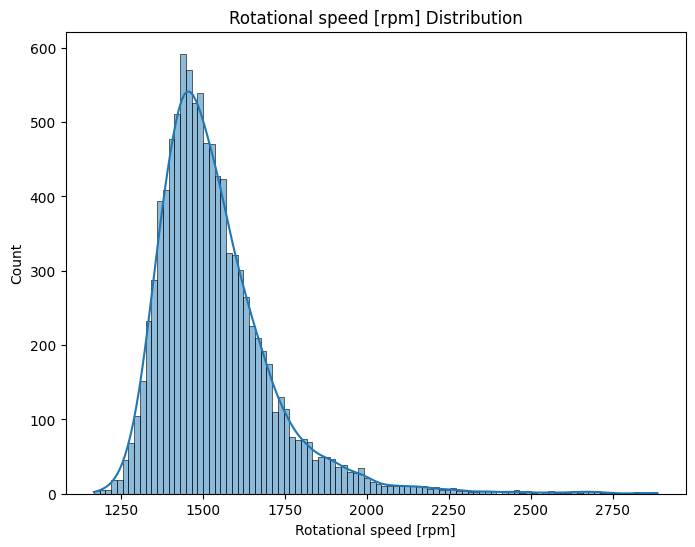

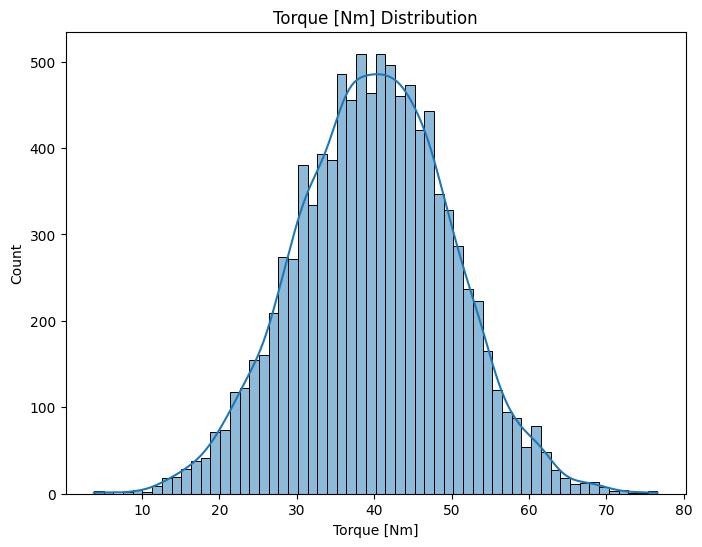

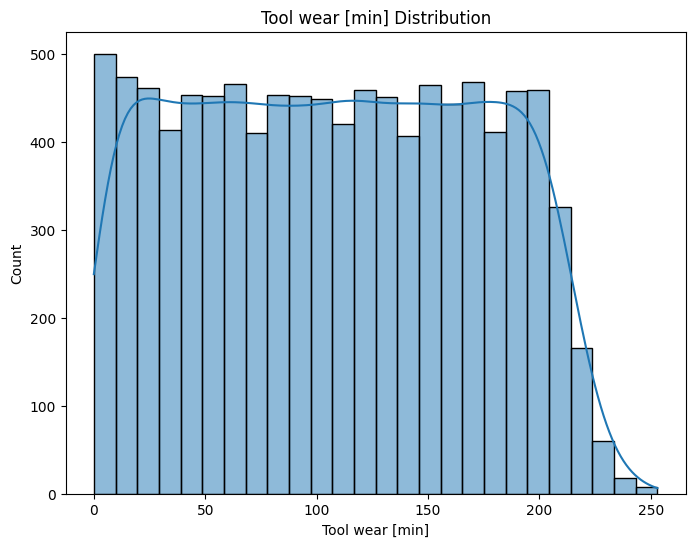

In [13]:
# Distribution Plots for Numerics Columns
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.savefig('numeric_col_distribution.png')
    plt.show()

ANother Target Column FAilure type
Cheking its distribution of which type of failure happens more

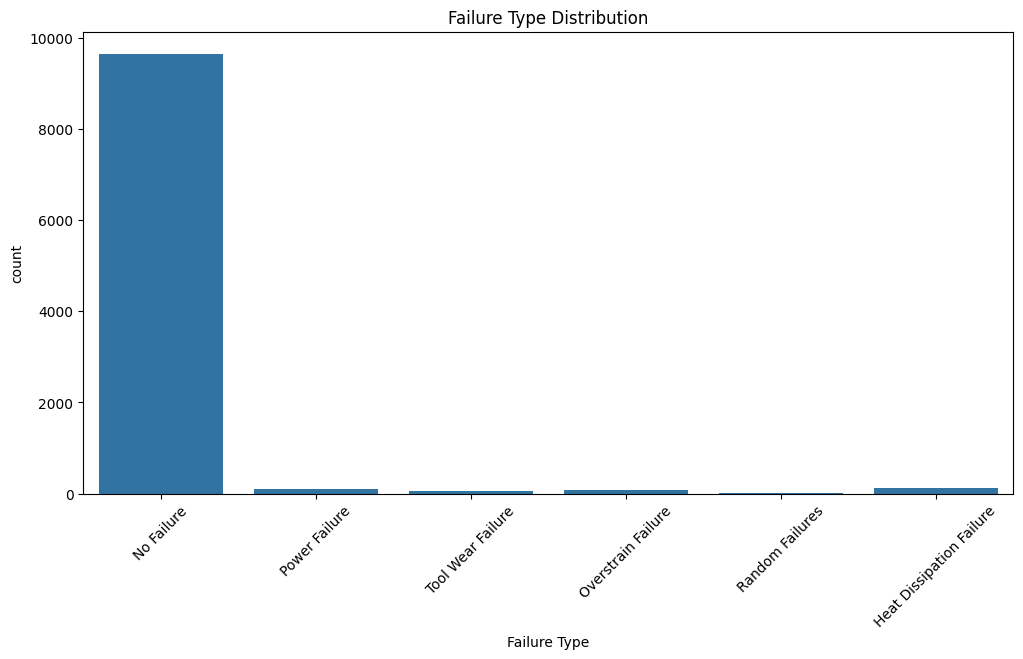

In [14]:
# Distribution of Failure Type COLUMN
plt.figure(figsize=(12, 6))
sns.countplot(x='Failure Type', data=data)
plt.title('Failure Type Distribution')
plt.xticks(rotation=45)
plt.savefig('failure_type_distribution.png')
plt.show()

# TRAINING

Applying label encoding to the Type and Failure Type columns to convert categorical data into numerical data using LabelEncoder.

#What is label encoding?
Label encoding converts each categorical value in a column to a numeric value. Each unique category is assigned a unique integer.

#How label encoding works
Identify all unique categories in a category column.
Assign a unique integer to each category.
Replaces each category in the dataset with its corresponding integer number.

In [15]:
# TYPE AND FAILURE TYPE COLUMNS TO BE LABEL ENCODE
columns_to_encode = ['Type', 'Failure Type']

# Initializing the LabelEncoderr
label_encoder = LabelEncoder()

# Applying label encoding to the specified columns
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])  # Converting categorical data to numeric value

Separates the features (X) and target variables (y).
X contains all columns except Target and Failure Type.
y contains only the Target and Failure Type columns.

In [16]:
# Assign x and y to predictions and target variables

x = data.drop(['Target', 'Failure Type'], axis=1) # except TAREGET and FAILURE TYPE COLUMNS data is shift into
y = data[['Target','Failure Type']]  # only TARGET and FAILURE TYPE

print(x.shape)
print(y.shape)

(10000, 8)
(10000, 2)


Splits the data into training and testing sets with 70% training data and 30% testing data using train_test_split.


In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42)  #TRAIN AND TEST SPLITS

Prints the shapes of the resulting datasets to verify the split

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 8)
(3000, 8)
(7000, 2)
(3000, 2)


Creates a RandomForestClassifier with 100 estimators (trees).
Fitting the model to the training data.
Computes the importance of each feature using clf.feature_importances_ and stores it in a pandas Series.


In [19]:
# creating the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fitting the model to the training set
clf.fit(x_train, y_train)

# View the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

Torque [Nm]                0.258391
Rotational speed [rpm]     0.226511
UDI                        0.129112
Tool wear [min]            0.121871
Product ID                 0.096781
Air temperature [K]        0.080190
Process temperature [K]    0.072977
Type                       0.014169
dtype: float64

# Visualizes the feature importance scores using a bar plot.

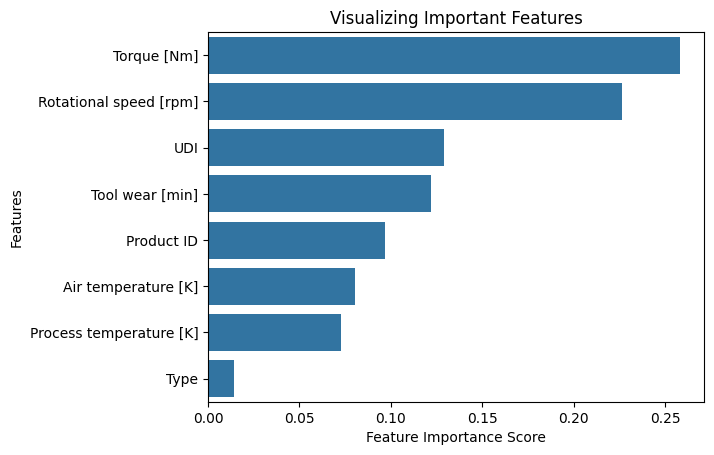

In [21]:
#bar-plot for the feature importance scores
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('feature_importance.png')
plt.show()

# GBM:
The Gradient Boosting classifier utilized in a comparable multi-target classification job. To assure reproducibility, a GradientBoostingClassifier is built with 100 estimators, a fixed random state, and a learning rate of 0.1. Additionally, a MultiOutputClassifier is wrapped around this classifier, allowing it to predict multiple target variables at once. The training dataset is used to train the combined classifier, while the test dataset is used to generate predictions. we are comparing the values (y_test) with the future prediction values (y_pred), the Accuracy of function determines the accuracy for each target variable. Ultimately, the accuracy outcomes for every target variable are displayed, offering a transparent comparison of the Gradient Boosting classifier's performance on the multi-target classification task.

In [22]:
# Creating the Gradiet Boosting classifier with multi output classifier
multi_target_clf = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42), n_jobs=-1)

# Train the classifier
multi_target_clf.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_clf.predict(x_test)

# Calculate accuracy for each target COLUMNS
accuracy_target_1 = accuracy_score(y_test['Target'], y_pred[:, 0])
accuracy_target_2 = accuracy_score(y_test['Failure Type'], y_pred[:, 1])

print(f"GBM Accuracy for 'Target': {accuracy_target_1}")
print(f"GBM Accuracy for 'Failure Type': {accuracy_target_2}")

GBM Accuracy for 'Target': 0.9853333333333333
GBM Accuracy for 'Failure Type': 0.9813333333333333


# Decision Tree:
First, we create a DecisionTreeClassifier with a fixed random state to handle multiple target variables. Then, we use MultiOutputClassifier to manage these variables effectively. The classifier is trained on a training dataset (x_train and y_train), fitting one decision tree for each target variable. We use the activity_score function to calculate the accuracy of each target variable ('target' and 'fault type') based on predictions made on the test dataset (x_test). The accuracies for all targets are included in the printed results.

In [23]:
# Creating the Decision Tree classifier with multi output classifier
multi_target_dtc = MultiOutputClassifier(DecisionTreeClassifier(random_state=42), n_jobs=-1)

# Train the classifier
multi_target_dtc.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_dtc.predict(x_test)

# Calculate accuracy for each target columns
accuracy_target_1 = accuracy_score(y_test['Target'], y_pred[:, 0])
accuracy_target_2 = accuracy_score(y_test['Failure Type'], y_pred[:, 1])

print(f"Decision Tree Accuracy for 'Target': {accuracy_target_1}")
print(f"Decision Tree Accuracy for 'Failure Type': {accuracy_target_2}")


Decision Tree Accuracy for 'Target': 0.9803333333333333
Decision Tree Accuracy for 'Failure Type': 0.9746666666666667


# Random Forest:
Random Forest classifier for classification with multiple targets. For reproducibility, a RandomForestClassifier is started with 100 trees and a set random state. After that, a MultiOutputClassifier is applied to this classifier, enabling it to handle numerous target variables at once. Predictions are made using the test data after the classifier has been trained on the training set. Each target variable ('Target' and 'Failure Type') has its forecast accuracy computed and printed.

In [24]:
# Create the Random Forest classifier with multi output classifier
multi_target_rfc = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42), n_jobs=-1)

# Train the classifier
multi_target_rfc.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_rfc.predict(x_test)

# Calculate accuracy for each target columns
accuracy_target_1 = accuracy_score(y_test['Target'], y_pred[:, 0])
accuracy_target_2 = accuracy_score(y_test['Failure Type'], y_pred[:, 1])

print(f"Random Forest Accuracy for 'Target': {accuracy_target_1}")
print(f"Random Forest Accuracy for 'Failure Type': {accuracy_target_2}")


Random Forest Accuracy for 'Target': 0.985
Random Forest Accuracy for 'Failure Type': 0.982


# SVM:
For multi-target classification, use the Support Vector Classifier (SVC). To handle numerous targets, an SVC is wrapped in a MultiOutputClassifier and initialized with a fixed random state. The training dataset is used to train the combined classifier, the test dataset is used to make predictions, and the accuracy for each target is calculated and shown.

In [25]:
# Creating the SVC classifier with multi-output classifier
multi_target_svc = MultiOutputClassifier(SVC(random_state=42), n_jobs=-1)

# Train the classifier
multi_target_svc.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svc.predict(x_test)

# Calculate accuracy for each target columns
accuracy_target_1 = accuracy_score(y_test['Target'], y_pred[:, 0])
accuracy_target_2 = accuracy_score(y_test['Failure Type'], y_pred[:, 1])

print(f"SVC Accuracy for 'Target': {accuracy_target_1}")
print(f"SVC Accuracy for 'Failure Type': {accuracy_target_2}")


SVC Accuracy for 'Target': 0.969
SVC Accuracy for 'Failure Type': 0.9676666666666667


#KNN:
The K-Nearest Neighbors (KNN) classifier is used to categorize several targets. A KNeighborsClassifier, which is encapsulated within a MultiOutputClassifier, is constructed using five neighbors. The classifier is then trained on the training set and used to predict the test set. Each target variable's precision is calculated and reported.

In [26]:
# Creating the KNN classifier with multi-output classifier
multi_target = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5), n_jobs=-1)

# Train the classifier
multi_target.fit(x_train, y_train)

# Make predictions
y_pred = multi_target.predict(x_test)

# Calculate accuracy for each target columns
accuracy_target_1 = accuracy_score(y_test['Target'], y_pred[:, 0])
accuracy_target_2 = accuracy_score(y_test['Failure Type'], y_pred[:, 1])

print(f"KNN Accuracy for 'Target': {accuracy_target_1}")
print(f"KNN Accuracy for 'Failure Type': {accuracy_target_2}")


KNN Accuracy for 'Target': 0.9713333333333334
KNN Accuracy for 'Failure Type': 0.9693333333333334


# Logistic Regression:
A logistic regression classifier is used for multi-target classification. A Logistic Regression classifier begins with a fixed random state and runs through up to 1000 iterations in order to ensure convergence. This classifier is contained within a MultiOutputClassifier in order to handle numerous targets. Predictions are made using the test dataset, the classifier is trained using the training dataset, and the accuracy for each target variable is calculated and reported.


In [27]:
# Creating the Logistic Regression classifier with multi_output classifier
multi_target = MultiOutputClassifier(LogisticRegression(random_state=42, max_iter=1000), n_jobs=-1)

# Train the classifierr
multi_target.fit(x_train, y_train)

# Make predictions
y_pred = multi_target.predict(x_test)

# Calculate accuracy for each target columns
accuracy_target_1 = accuracy_score(y_test['Target'], y_pred[:, 0])
accuracy_target_2 = accuracy_score(y_test['Failure Type'], y_pred[:, 1])

print(f"Logistic Regression Accuracy for 'Target': {accuracy_target_1}")
print(f"Logistic Regression Accuracy for 'Failure Type': {accuracy_target_2}")


Logistic Regression Accuracy for 'Target': 0.974
Logistic Regression Accuracy for 'Failure Type': 0.9676666666666667


# Concluding Remarks

We checked how well different machine learning models can predict "target" and "failure type" at the same time. We used MultiOutputClassifier to test Decision Tree, Gradient Boosting Machine (GBM), Random Forest, Support Vector Classifier (SVC), K-Nearest Neighbors (KNN), and logistic regression.

We measured how good each model was by looking at their accuracy scores for “Target” and “Failure Type.” The Random Forest model was very good with scores of 0.985 for “Target” and 0.982 for “Failure Type.” The Gradient Boosting Machine (GBM) was even better, with scores of 0.9853 for both “Target” and “Failure Type.” The Decision Tree was also good, with 0.9803 for “Target” and 0.9747 for “Failure Type.”

Another model did well too, with scores of 0.9693 for “Failure Type” and 0.9713 for “Target.” Logistic regression worked well with 0.974 for “Target” and 0.9677 for “Failure Type.” The Support Vector Classifier (SVC) was decent with 0.969 for “Target” and 0.9677 for “Failure Type,” but it was not as good as the others.

The best models for predicting “Target” and “Failure Type” were Random Forest and Gradient Boosting Machine (GBM). These models work well with complex data, as shown by their high accuracy scores.
